In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
from scipy.stats import sem
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm
from os import listdir

In [2]:
W = 5.88    # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W),#/(4/3)),     # 1:1 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 10,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

In [3]:
def set_size(width='thesis', fraction=1, subplots=(1, 1),aspect_ratio=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    #aspect_ratio = 1#(5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [4]:
datapath = Path.cwd() / "data/disorder_scaling/"
figurepath = Path.cwd() / "figures"

In [5]:
folders = [datapath/"h = 0/Rhim",datapath/"h = 0/Rhim_FR",datapath/"h = 0/WAHUHA",datapath/"h = 0/WAHUHA_FR",
            datapath/"h = 3/Rhim",datapath/"h = 3/Rhim_FR",datapath/"h = 3/WAHUHA",datapath/"h = 3/WAHUHA_FR",
            datapath/"h = 6/Rhim",datapath/"h = 6/Rhim_FR",datapath/"h = 6/WAHUHA",datapath/"h = 6/WAHUHA_FR",
            datapath/"h = 9/Rhim",datapath/"h = 9/Rhim_FR",datapath/"h = 9/WAHUHA",datapath/"h = 9/WAHUHA_FR",
            datapath/"h = 12/Rhim",datapath/"h = 12/Rhim_FR",datapath/"h = 12/WAHUHA",datapath/"h = 12/WAHUHA_FR"]

In [6]:
T = np.arange(0.1,20.1,0.1)
hs = [0,3,6,9,12]

In [7]:
num = 100
fidRCS = []
for ind,fi in enumerate([1,5,9,13,17]):
    fidRCS.append([])
    for file in listdir(folders[fi]/"n = {}".format(num)):
        if ".jld2" in file:
            with h5py.File(folders[fi]/("n = {}".format(num))/file) as f:
                fidRCS[ind].append(np.swapaxes(f["fidelities"][()],0,-1))
    fidRCS[ind] = np.concatenate(fidRCS[ind],axis=1)

fidWCS = []
for ind,fi in enumerate([3,7,11,15,19]):
    fidWCS.append([])
    for file in listdir(folders[fi]/"n = {}".format(num)):
        if ".jld2" in file:
            with h5py.File(folders[fi]/("n = {}".format(num))/file) as f:
                fidWCS[ind].append(np.swapaxes(f["fidelities"][()],0,-1))
    fidWCS[ind] = np.concatenate(fidWCS[ind],axis=1)

In [8]:
fidmin = 0.95
TmaxsWCS = np.zeros((len(hs),100))
TmaxsRCS = np.zeros((len(hs),100))

for i in range(len(hs)):
    if i == 0:
        TmaxsRCS[i,0] = T[np.argmin(np.abs(np.mean(fidRCS[i],axis=-1)[:,0]-fidmin))]
        TmaxsWCS[i,0] = T[np.argmin(np.abs(np.mean(fidWCS[i],axis=-1)[:,0]-fidmin))]
    else:
        for s in range(100):
            TmaxsRCS[i,s] = T[np.argmin(np.abs(np.mean(fidRCS[i],axis=-1)[:,s]-fidmin))]
            TmaxsWCS[i,s] = T[np.argmin(np.abs(np.mean(fidWCS[i],axis=-1)[:,s]-fidmin))]

TmaxRCS_mean = np.concatenate(([TmaxsRCS[0,0]],np.mean(TmaxsRCS[1:,:],axis=1)))
TmaxWCS_mean = np.concatenate(([TmaxsWCS[0,0]],np.mean(TmaxsWCS[1:,:],axis=1)))
TmaxRCS_std = np.concatenate(([0],np.std(TmaxsRCS[1:,:],axis=1)))
TmaxWCS_std = np.concatenate(([0],np.std(TmaxsWCS[1:,:],axis=1)))

In [9]:
fidWCS[0].shape

(200, 1, 50)

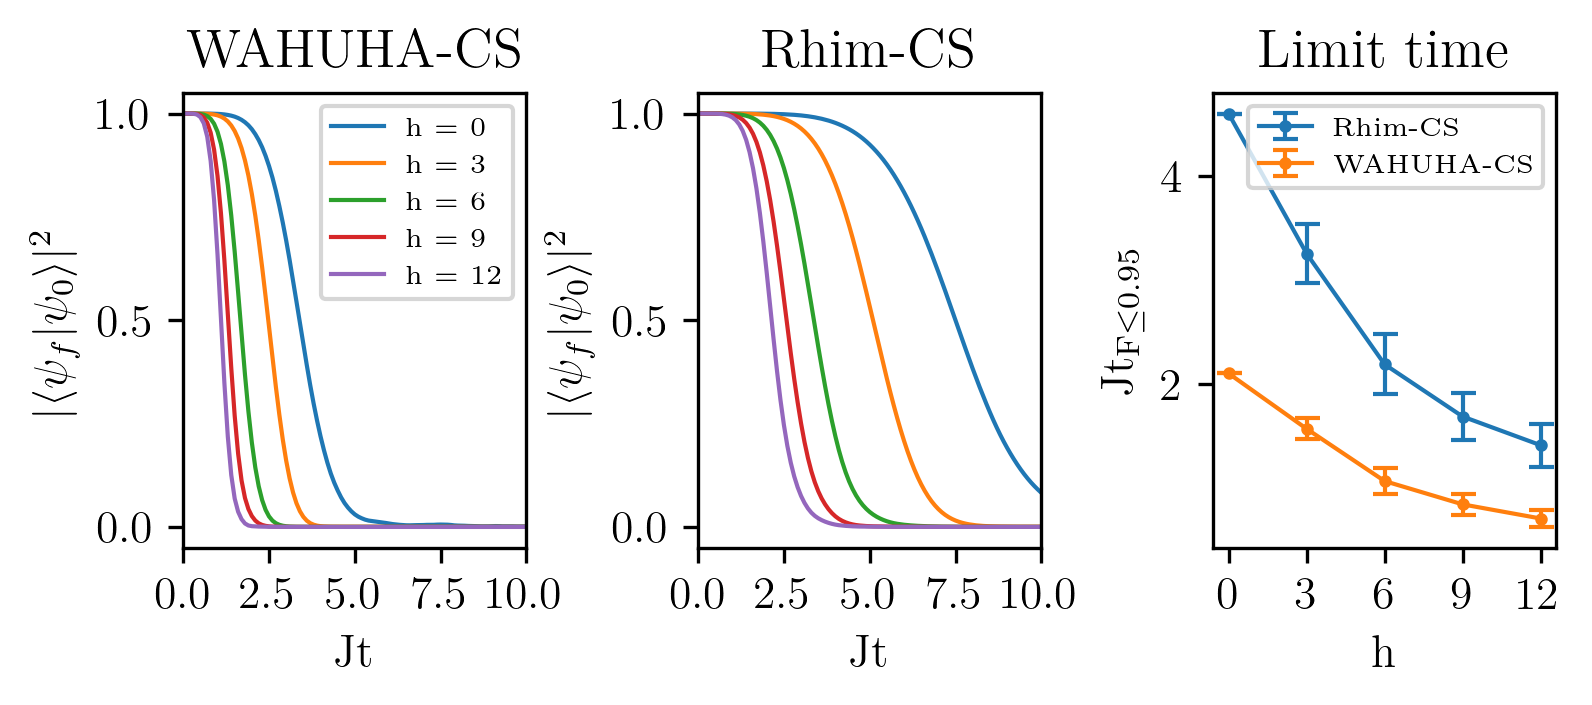

In [10]:
fig,axs = plt.subplots(1,3,figsize=set_size(subplots=(1,3)),dpi=300)



axs[0].plot(T,np.mean(fidWCS[0],axis=(1,-1)),c="C0",lw=1,label="h = 0")
axs[0].plot(T,np.mean(fidWCS[1],axis=(1,-1)),c="C1",lw=1,label="h = 3")
axs[0].plot(T,np.mean(fidWCS[2],axis=(1,-1)),c="C2",lw=1,label="h = 6")
axs[0].plot(T,np.mean(fidWCS[3],axis=(1,-1)),c="C3",lw=1,label="h = 9")
axs[0].plot(T,np.mean(fidWCS[4],axis=(1,-1)),c="C4",lw=1,label="h = 12")

axs[0].legend(fontsize="xx-small")
axs[0].set_xlim(0,10)
axs[0].set_xticks([0,2.5,5,7.5,10])
axs[0].set_xlabel("Jt")
axs[0].set_ylabel(r"$|\langle\psi_f|\psi_0\rangle|^2$")
axs[0].set_title("WAHUHA-CS")


axs[1].plot(T,np.mean(fidRCS[0],axis=(1,-1)),c="C0",lw=1,label="h = 0")
axs[1].plot(T,np.mean(fidRCS[1],axis=(1,-1)),c="C1",lw=1,label="h = 3")
axs[1].plot(T,np.mean(fidRCS[2],axis=(1,-1)),c="C2",lw=1,label="h = 6")
axs[1].plot(T,np.mean(fidRCS[3],axis=(1,-1)),c="C3",lw=1,label="h = 9")
axs[1].plot(T,np.mean(fidRCS[4],axis=(1,-1)),c="C4",lw=1,label="h = 12")

axs[1].set_xlim(0,10)
axs[1].set_xticks([0,2.5,5,7.5,10])
axs[1].set_xlabel("Jt")
axs[1].set_ylabel(r"$|\langle\psi_f|\psi_0\rangle|^2$")
axs[1].set_title("Rhim-CS")


axs[2].errorbar(hs,TmaxRCS_mean,yerr=TmaxRCS_std,c="C0",lw=1,label="Rhim-CS",capsize=3,marker="o",ms=2)
axs[2].errorbar(hs,TmaxWCS_mean,yerr=TmaxWCS_std,c="C1",lw=1,label="WAHUHA-CS",capsize=3,marker="o",ms=2)
axs[2].legend(fontsize="xx-small")
axs[2].set_xticks([0,3,6,9,12])
axs[2].set_xlabel("h")
axs[2].set_ylabel(r"$\mathrm{Jt_{F\leq0.95}}$")
axs[2].set_title("Limit time")

plt.subplots_adjust(wspace=0.5)
plt.savefig(figurepath/"disorder_scaling.png",format="png",bbox_inches='tight',dpi=600)
plt.show()